# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [2]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [3]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título

df["title_length"] = df["title"].apply(len)
df["title_length"].head()

0    24
1    13
2    22
3    15
4    12
Name: title_length, dtype: int64

In [4]:
# Calcula media, mediana y moda de la columna 'title_length'

media = np.mean(df["title_length"])
mediana = np.median(df["title_length"])
moda = mode(df["title_length"], keepdims=True).mode[0]
print(f"La media es : {media}")
print(f"La mediana es : {mediana}")
print(f"La moda es : {moda}")

La media es : 15.481103166496425
La mediana es : 14.0
La moda es : 12


In [5]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'

rango = np.max(df["title_length"]) - np.min(df["title_length"])
varianza = np.var(df["title_length"], ddof=1)
desv = np.std(df["title_length"], ddof=1)
print(f"El rango es : {rango}")
print(f"La varianza es : {varianza}")
print(f"La desviación estándar es : {desv}")

El rango es : 67
La varianza es : 72.1067488840288
La desviación estándar es : 8.491569282766807


In [6]:
# Calcula asimetría y curtosis de la columna 'title_length'

asimetría = skew(df["title_length"])
curtosis = kurtosis(df["title_length"])
print(f"La asimetría es : {asimetría}")
print(f"La curtosis es : {curtosis}")

La asimetría es : 1.5229143965677572
La curtosis es : 3.7867237597626007


In [7]:
# Imprime el título más corto y el título más largo según su longitud

corto = df.loc[df["title_length"].idxmin(), "title"]
largo = df.loc[df["title_length"].idxmax(), "title"]
print(f"Título más corto : {corto}")
print(f"Título más largo: {largo}")


Título más corto : M
Título más largo: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb


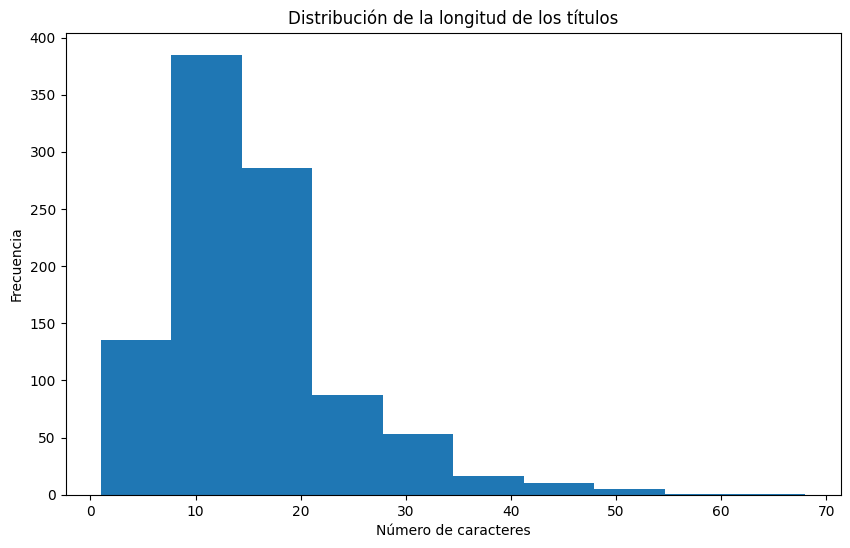

In [15]:
# grafica tus resultados

plt.figure(figsize=(10, 6))
plt.hist(df["title_length"])
plt.title("Distribución de la longitud de los títulos")
plt.xlabel("Número de caracteres")
plt.ylabel("Frecuencia")
plt.show()

---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [19]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]

lista = [10, 13, 14, 18, 22]

In [20]:
df['title_length'].unique()

array([24, 13, 22, 15, 12, 30, 45, 16, 10, 49,  9, 46, 37, 31, 11, 21, 18,
        5, 17, 28,  8, 19, 23,  6, 14, 26,  7, 68,  1, 27, 42, 32, 20, 34,
        2,  3,  4, 33, 35, 25, 36, 44, 29, 54, 48, 40, 50, 58, 41, 38, 39,
       47])

In [21]:
# Calcula la media de los 5 valores

media_Lista = sum(lista) / len(lista)
print(f"La media es : {media_Lista}")


La media es : 15.4


In [22]:
# Calcula las diferencias al cuadrado con respecto a la media

sumadifcuadrados = sum((x - media_Lista)**2 for x in lista)
print(f"Suma de las diferencias al cuadrado : {sumadifcuadrados}")

Suma de las diferencias al cuadrado : 87.19999999999999


In [24]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación

varianza2 = sumadifcuadrados / len(lista)
desv2 = varianza2 ** 0.5
print(f"La varianza es : {varianza2}")
print(f"la desviación estándar es : {desv2}")


La varianza es : 17.439999999999998
la desviación estándar es : 4.176122603564219
